In [1]:
# step-1 Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  # import the evaluation metrics used to measure the accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
  # import the model_selection to divide the data set into training set and testing set
from sklearn.model_selection import train_test_split
  # Importing the library for preprocessing and hyberparameter tuning
from sklearn.preprocessing import StandardScaler
  # importing the machine learning model we are using random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
# step-2 Load the Data set
 # Assigning the data set name to a variable name
dataset='SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'
 # Dividing the years from 2010 to 2017
years=range(2010,2017)
 # Loading the dataset by using the read_excel file for commodities and industries
commodities_data=pd.read_excel(dataset,sheet_name=f'{years[0]}_Detail_Commodity')
industries_data=pd.read_excel(dataset,sheet_name=f'{years[0]}_Detail_Industry')


In [3]:
# Checking the Commodities data are correctly loaded or not by using df.head() method
commodities_data.head(2)

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1


In [4]:
industries_data.head(2)

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1


In [5]:
# Step-3 Data Preprocessing
years_data=[]
for i in years:
    try:
        # Dividing the given dataset into different sub datasets based on the year of each industry and commodity
        df_commodity=pd.read_excel(dataset,sheet_name=f'{i}_Detail_Commodity')
        df_industry=pd.read_excel(dataset,sheet_name=f'{i}_Detail_Industry')
        #Adding source and year columns to the newely created datsets
        df_commodity['Source']='Commodity'
        df_industry['Source']='Industry'
        df_commodity['Year']=df_industry['Year']=i
        #  Remove white spaces form column names
        df_commodity.columns=df_commodity.columns.str.strip()
        df_industry.columns=df_industry.columns.str.strip()
        # Rename Columns for consistency
        df_commodity.rename(columns={'Commodity_Code':'Code','Commodity_Name':'Name'},inplace=True)
        df_industry.rename(columns={'Industry_Code':'Code','Industy_Name':'Name'},inplace=True)
        # Concatenate commodity and industry data and append to the list
        years_data.append(pd.concat([df_commodity, df_industry],ignore_index=True))
    except Exception as e:
        print("Error Processing Year:", i, "Error:", str(e))

In [6]:
# Combine all the yaers data into a single DataFrame
df=pd.concat(years_data,ignore_index=True)
df.head(1)

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year,Industry Code,Industry Name
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.47,NaN,4,3,1,4,1,Commodity,2010,NaN,NaN


In [7]:
df.columns
#  printing the name of the columns

Index(['Commodity Code', 'Commodity Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year',
       'Industry Code', 'Industry Name'],
      dtype='object')

In [8]:
df.isnull().sum()

Commodity Code                                            11060
Commodity Name                                            11060
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
Unnamed: 7                                                22092
DQ ReliabilityScore of Factors without Margins                0
DQ TemporalCorrelation of Factors without Margins             0
DQ GeographicalCorrelation of Factors without Margins         0
DQ TechnologicalCorrelation of Factors without Margins        0
DQ DataCollection of Factors without Margins                  0
Source                                                        0
Year                                                          0
Industry Code                           

In [9]:
#  Here, we are dropping the unnamed column and renaming the columns to match the expected output.
df.drop(columns=['Unnamed: 7'],inplace=True)

In [10]:
df.isnull().sum()

Commodity Code                                            11060
Commodity Name                                            11060
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
DQ ReliabilityScore of Factors without Margins                0
DQ TemporalCorrelation of Factors without Margins             0
DQ GeographicalCorrelation of Factors without Margins         0
DQ TechnologicalCorrelation of Factors without Margins        0
DQ DataCollection of Factors without Margins                  0
Source                                                        0
Year                                                          0
Industry Code                                             11032
Industry Name                           

In [11]:
df.columns

Index(['Commodity Code', 'Commodity Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year',
       'Industry Code', 'Industry Name'],
      dtype='object')

In [12]:
df.describe().T # Checking summary statistics 
# we are  computes summary statistics of the DataFrame like mean,median,std,etc.
# .T: This is a Pandas DataFrame attribute that transposes the DataFrame

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


In [13]:
df.isnull().sum() # Checking for null values in each column

Commodity Code                                            11060
Commodity Name                                            11060
Substance                                                     0
Unit                                                          0
Supply Chain Emission Factors without Margins                 0
Margins of Supply Chain Emission Factors                      0
Supply Chain Emission Factors with Margins                    0
DQ ReliabilityScore of Factors without Margins                0
DQ TemporalCorrelation of Factors without Margins             0
DQ GeographicalCorrelation of Factors without Margins         0
DQ TechnologicalCorrelation of Factors without Margins        0
DQ DataCollection of Factors without Margins                  0
Source                                                        0
Year                                                          0
Industry Code                                             11032
Industry Name                           

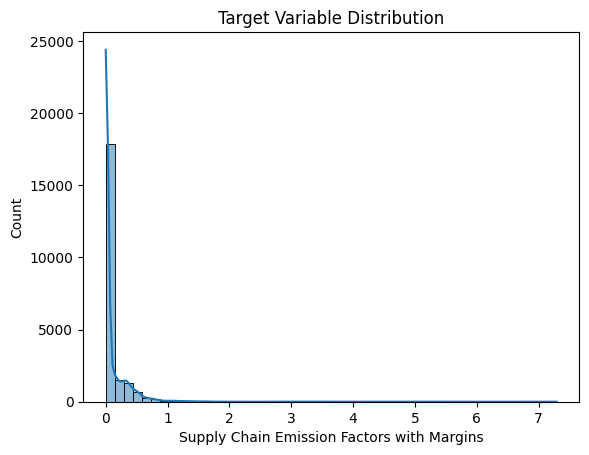

In [14]:
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde=True)
plt.title('Target Variable Distribution')
plt.show()
# code uses Seaborn's histplot function to create a histogram of the 'Supply Chain Emission Factors with Margins' column 
# from the DataFrame df, with 50 bins and a kernel density estimate (KDE) overlay.
#  It then sets the title of the plot to 'Target Variable Distribution' and displays the plot
#  using Matplotlib's plt.show().

In [15]:
# Check categorical variables
print(df['Substance'].value_counts())
# used to display the count of unique values in the 'Substance' column of the DataFrame

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [16]:
print(df['Unit'].value_counts()) # Checking unique values in 'Unit' with count 

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [17]:
print(df['Unit'].unique()) # Checking unique values in 'Unit'

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [18]:
print(df['Source'].value_counts()) # Checking unique values in 'Source' with count

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [19]:
df['Substance'].unique() # Checking unique values in 'Substance' 

array(['carbon dioxide', 'methane', 'nitrous oxide', 'other GHGs'],
      dtype=object)

In [20]:
substance_map={'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3}

In [21]:
# Mapping substances to integers 
# categorical values in the 'Substance' column of the DataFrame df with their corresponding integer 
# values from the substance_map dictionary, effectively encoding the substances as numerical data.
df['Substance']=df['Substance'].map(substance_map) 

In [22]:
df['Substance'].unique() # Checking unique values in 'Substance' 

array([0, 1, 2, 3], dtype=int64)

In [23]:
print(df['Unit'].unique()) # Checking unique values in 'Unit' 

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [24]:
unit_map={'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1} # Mapping units to integers 
df['Unit']=df['Unit'].map(unit_map)
print(df['Unit'].unique()) # Checking unique values in 'Unit' 

[0 1]


In [25]:
print(df['Source'].unique()) # Checking unique values in 'Source' 
['Commodity' 'Industry']
source_map={'Commodity':0, 'Industry':1} # Mapping sources to integers 
df['Source']=df['Source'].map(source_map)   # applying the mapping to 'Source' column 
print(df['Source'].unique()) # Checking unique values in 'Source' 
df.info() # Checking data types and non-null counts after mapping 

['Commodity' 'Industry']
[0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Commodity Code                                          11032 non-null  object 
 1   Commodity Name                                          11032 non-null  object 
 2   Substance                                               22092 non-null  int64  
 3   Unit                                                    22092 non-null  int64  
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ Te

In [26]:
df['Commodity Code'].unique() # Checking unique values in 'Code' df['Code']

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [27]:
df['Commodity Name'].unique() # Checking unique values in 'Name' 

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [28]:
len(df['Commodity Name'].unique()) # Checking number of unique values in 'Name' 

395

In [29]:
top_emitters = df[['Commodity Name', 'Supply Chain Emission Factors with Margins']].groupby('Commodity Name').mean().sort_values(
    'Supply Chain Emission Factors with Margins', ascending=False).head(10) 

# Resetting index for better plotting
top_emitters = top_emitters.reset_index()
top_emitters

,Commodity Name,Supply Chain Emission Factors with Margins
0,Cement,1.324964
1,Electricity,1.016143
2,"Dolls, toys, and games",0.832179
3,Lime and gypsum products,0.816536
4,Compressed Gases,0.539679
5,Clothing,0.468714
6,Synthetic dyes and pigments,0.358000
7,Truck transport,0.350964
8,"Copper, nickel, lead, and zinc",0.338464
9,Pipeline transport,0.316321


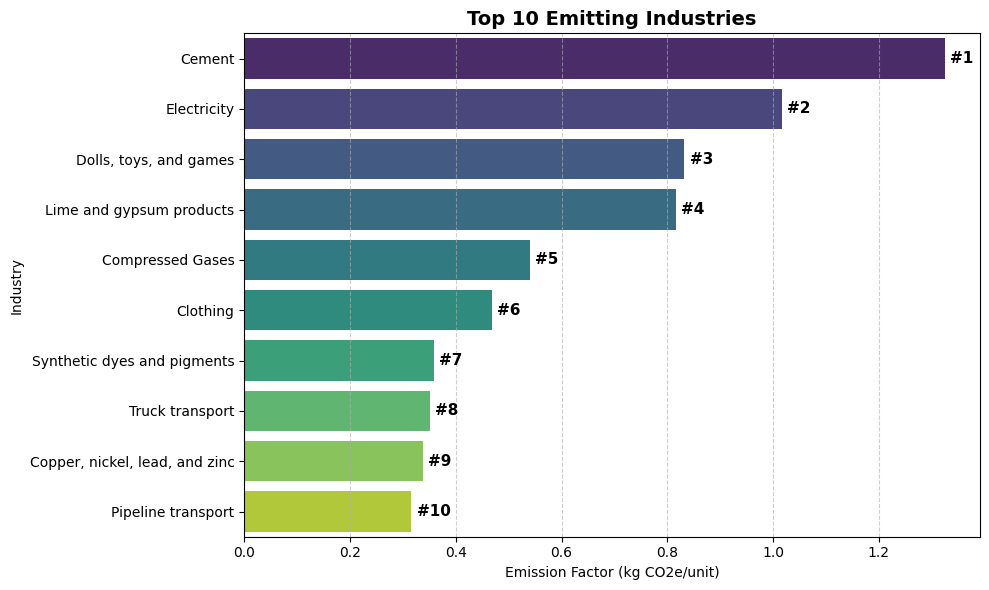

In [30]:
# Plotting the top 10 emitting industries


plt.figure(figsize=(10,6))
# Example: Top emitting industries (already grouped)
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Commodity Name',
    data=top_emitters,
    hue='Commodity Name',
    palette='viridis'  # Use 'Blues', 'viridis', etc., for other color maps
)

# Add ranking labels (1, 2, 3...) next to bars
for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
    plt.text(value + 0.01, i - 1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold') # Title of the plot 
plt.xlabel('Emission Factor (kg CO2e/unit)') # X-axis label
plt.ylabel('Industry') # Y-axis label
plt.grid(axis='x', linestyle='--', alpha=0.6) # Adding grid lines for better readability
plt.tight_layout() # Adjust layout to prevent overlap

plt.show()

In [31]:
# Drop non-numeric columns not needed,
# Alos drop Code and Year columns since there is no need of both of the columns
df.drop(columns=['Commodity Name','Commodity Code','Year'], inplace=True) 
df.head(1)

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Industry Code,Industry Name
0,0,0,0.398,0.073,0.47,4,3,1,4,1,0,NaN,NaN


In [32]:
df.shape
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source',
       'Industry Code', 'Industry Name'],
      dtype='object')

In [33]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins']) # Feature set excluding the target variable
y = df['Supply Chain Emission Factors with Margins'] # Target variable 
X.head()


,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Industry Code,Industry Name
0,0,0,0.398,0.073,4,3,1,4,1,0,NaN,NaN
1,1,0,0.001,0.001,4,3,1,1,1,0,NaN,NaN
2,2,0,0.002,0.000,4,3,1,4,1,0,NaN,NaN
3,3,1,0.002,0.000,3,3,1,3,1,0,NaN,NaN
4,0,0,0.659,0.081,4,3,1,4,1,0,NaN,NaN


In [34]:
y.head()

0    0.470
1    0.002
2    0.002
3    0.002
4    0.740
Name: Supply Chain Emission Factors with Margins, dtype: float64

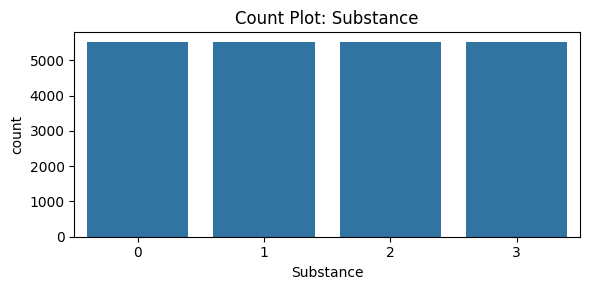

In [35]:
# Count plot for Substance
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Substance"])
plt.title("Count Plot: Substance")
plt.xticks()
plt.tight_layout()
plt.show()

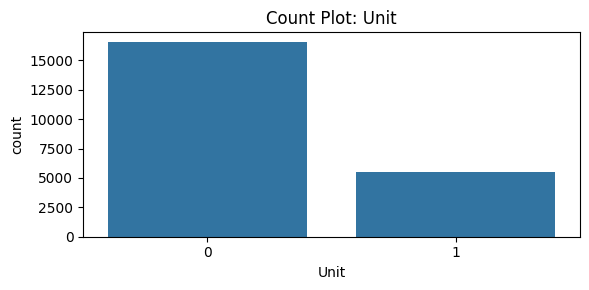

In [36]:
# Count plot for Unit
plt.figure(figsize=(6, 3))
sns.countplot(x=df["Unit"])
plt.title("Count Plot: Unit")
plt.tight_layout()
plt.show()

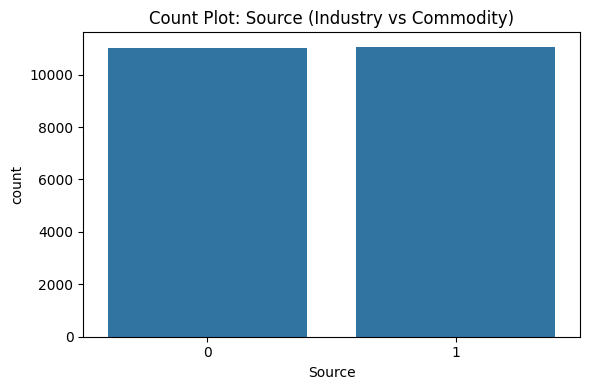

In [37]:
# Count plot for Source
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Source"])
plt.title("Count Plot: Source (Industry vs Commodity)")
plt.tight_layout()
plt.show()

In [38]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source',
       'Industry Code', 'Industry Name'],
      dtype='object')

In [39]:
df.select_dtypes(include=np.number).corr() # Checking correlation between numerical feature

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000e+00,7.745967e-01,-0.391851,-0.218400,-0.421603,0.095092,-3.667637e-15,NaN,0.198415,NaN,4.273306e-16
Unit,7.745967e-01,1.000000e+00,-0.155859,-0.094300,-0.169741,-0.025159,-3.173071e-17,NaN,0.286990,NaN,-1.545892e-17
Supply Chain Emission Factors without Margins,-3.918505e-01,-1.558594e-01,1.000000,0.143005,0.962971,-0.098000,9.283870e-03,NaN,0.148410,NaN,2.713112e-02
Margins of Supply Chain Emission Factors,-2.184002e-01,-9.429989e-02,0.143005,1.000000,0.404541,-0.069598,7.953109e-03,NaN,0.086335,NaN,-6.750426e-02
Supply Chain Emission Factors with Margins,-4.216032e-01,-1.697410e-01,0.962971,0.404541,1.000000,-0.109494,1.074848e-02,NaN,0.160574,NaN,6.687828e-03
DQ ReliabilityScore of Factors without Margins,9.509190e-02,-2.515938e-02,-0.098000,-0.069598,-0.109494,1.000000,-2.170715e-02,NaN,0.073583,NaN,-1.228726e-02
DQ TemporalCorrelation of Factors without Margins,-3.667637e-15,-3.173071e-17,0.009284,0.007953,0.010748,-0.021707,1.000000e+00,NaN,-0.030607,NaN,-2.909814e-15
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,1.984154e-01,2.869901e-01,0.148410,0.086335,0.160574,0.073583,-3.060675e-02,NaN,1.000000,NaN,2.827202e-02
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df.info() # Checking data types and non-null counts after mapping 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22092 non-null  int64  
 1   Unit                                                    22092 non-null  int64  
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  float64
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 7   DQ GeographicalCorrelation of Factors without Margins   22092 non-null  int64  
 8   DQ TechnologicalCorrelation of Facto

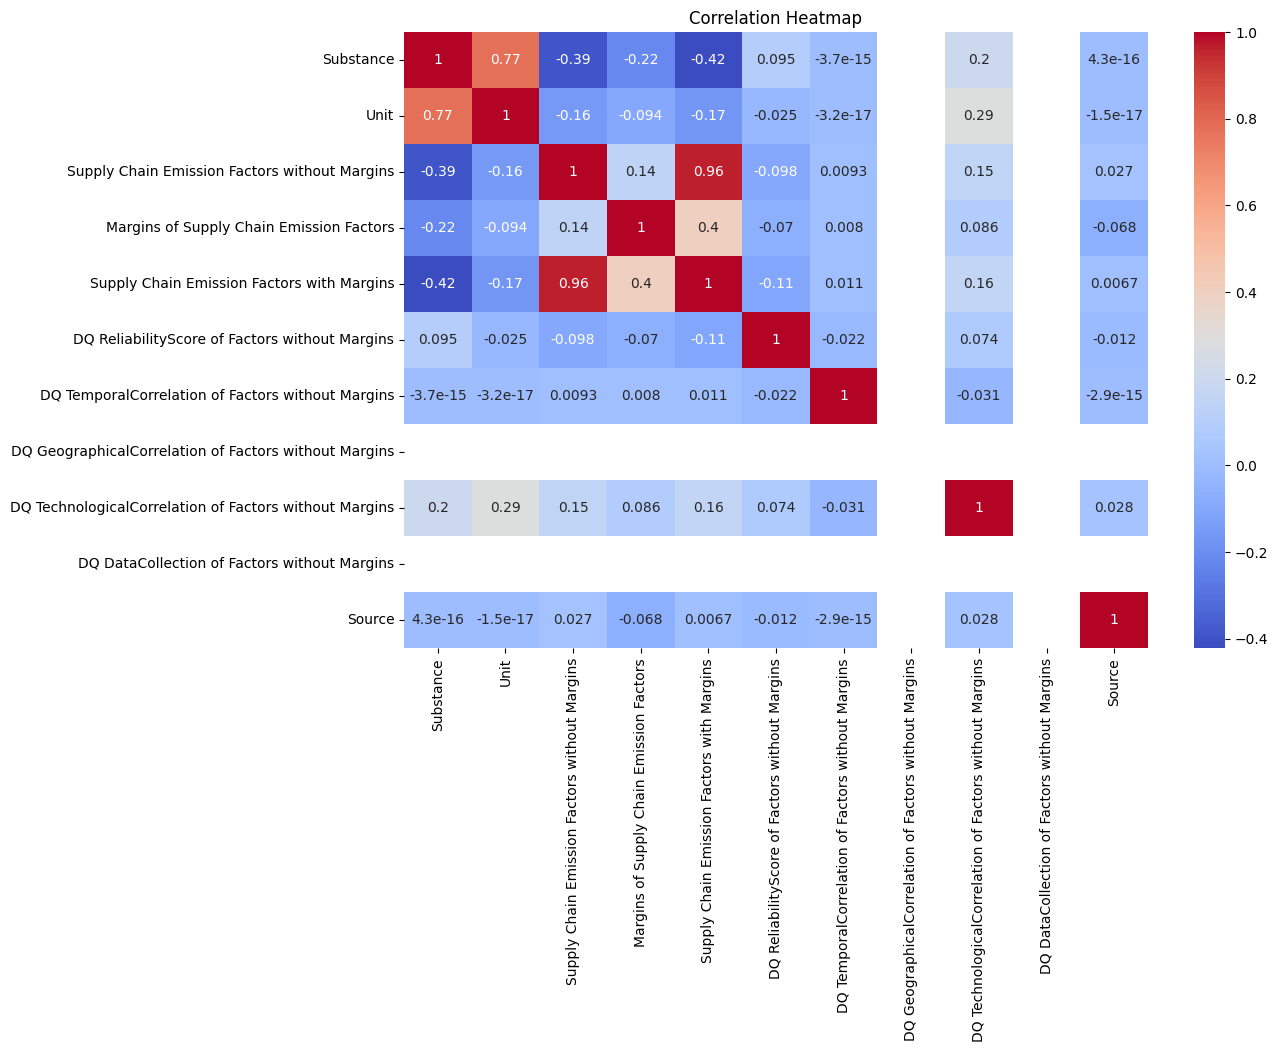

In [41]:
# Correlation matrix 
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [42]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Substance,22092.0,1.500000,1.118059,0.0,0.75,1.500,2.250,3.000
Unit,22092.0,0.250000,0.433023,0.0,0.00,0.000,0.250,1.000
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.00,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.00,0.000,0.000,3.349
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.00,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.00,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.00,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
Source,22092.0,0.500634,0.500011,0.0,0.00,1.000,1.000,1.000


In [43]:
# Normalize features
from sklearn.preprocessing import StandardScaler
X_encoded = pd.get_dummies(X, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
   

In [44]:
X_scaled[0].min(),X_scaled[0].max()

(-1.3416407864998738, 1.3849614361966767)

In [45]:
np.round(X_scaled.mean()),np.round(X_scaled.std())

(-0.0, 1.0)

In [46]:
# Divide the data into train and test set
X.shape

(22092, 12)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # Splitting data into training and testing sets 

In [48]:
X_train.shape

(17673, 798)

In [49]:
X_test.shape

(4419, 798)

In [50]:
# Select the model for training
# Here we use random forest regressor 
RF_model = RandomForestRegressor(random_state=42) # Initializing Random Forest Regressor 

In [51]:
# Step 4: Training
RF_model.fit(X_train, y_train) # Fitting the model on training data 

RandomForestRegressor(random_state=42)

In [52]:
# Step 5 Prediction and Evaluation
RF_y_pred = RF_model.predict(X_test) # Making predictions on the test set 


In [53]:
RF_y_pred[:20]

array([2.93080000e-01, 1.00000000e-03, 1.00000000e-03, 1.00000000e-03,
       0.00000000e+00, 4.00000000e-03, 1.24555977e-04, 2.20009044e-03,
       2.00000000e-03, 3.94050000e-01, 0.00000000e+00, 1.40000000e-02,
       4.00000000e-03, 7.00000000e-03, 2.00000000e-03, 0.00000000e+00,
       1.02821706e-03, 3.14960000e-01, 9.00000000e-03, 0.00000000e+00])

In [54]:
RF_mse = mean_squared_error(y_test, RF_y_pred) # Calculating Mean Squared Error (MSE)
RF_rmse = np.sqrt(RF_mse) # Calculating Root Mean Squared Error (RMSE)
# Calculating R² score
RF_r2 = r2_score(y_test, RF_y_pred)

print(f'RMSE: {RF_rmse}')
print(f'R² Score: {RF_r2}')

RMSE: 0.005914377979609521
R² Score: 0.9993772564008052


In [55]:
from sklearn.linear_model import LinearRegression # Importing Linear Regression model 
LR_model = LinearRegression() # Initializing Linear Regression model
# Fitting the Linear Regression model on training data

LR_model.fit(X_train, y_train)

LR_y_pred = LR_model.predict(X_test) # Making predictions on the test set using Linear Regression model 


LR_mse = mean_squared_error(y_test, LR_y_pred) # Calculating Mean Squared Error (MSE) for Linear Regression model
LR_rmse = np.sqrt(LR_mse) # Calculating Root Mean Squared Error (RMSE) for Linear Regression model 
LR_r2 = r2_score(y_test, LR_y_pred) # Calculating R² score for Linear Regression model 

print(f'RMSE: {LR_rmse}')
print(f'R² Score: {LR_r2}')

RMSE: 0.0002813922000004227
R² Score: 0.9999985903372305


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Perform randomized search with cross-validation to find the best hyperparameters 
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=5, cv=2, n_jobs=-1)

# Fit the randomized search model on the training data 
random_search.fit(X_train, y_train)

# Best model from random search
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}


In [57]:
# Use best parameters for prediction
# Use the best model to make predictions on the test set 
y_pred_best = best_model.predict(X_test)


HP_mse = mean_squared_error(y_test, y_pred_best)
HP_rmse = np.sqrt(HP_mse)
HP_r2 = r2_score(y_test, y_pred_best)

print(f'RMSE: {HP_rmse}')
print(f'R² Score: {HP_r2}')

RMSE: 0.005914377979609521
R² Score: 0.9993772564008052


In [58]:
# Step 7: Comapartive Study and Selecting the Best model
# Create a comparative DataFrame for all models
results = {
    'Model': ['Random Forest (Default)', 'Linear Regression', 'Random Forest (Tuned)'],
    'MSE': [RF_mse, LR_mse, HP_mse],
    'RMSE': [RF_rmse, LR_rmse, HP_rmse],
    'R2': [RF_r2, LR_r2, HP_r2]
}

# Create a DataFrame to compare the results of different models
comparison_df = pd.DataFrame(results)
print(comparison_df)

                     Model           MSE      RMSE        R2
0  Random Forest (Default)  3.497987e-05  0.005914  0.999377
1        Linear Regression  7.918157e-08  0.000281  0.999999
2    Random Forest (Tuned)  3.497987e-05  0.005914  0.999377


In [59]:
# Save model and encoders
# Create a directory to save the models if it doesn't exist 
!mkdir models 
# Save model and encoders 


In [60]:
import joblib
joblib.dump(best_model, 'models/LR_model.pkl')    # Save the best model 
joblib.dump(scaler, 'models/scaler.pkl') # Save the scaler used for normalization

['models/scaler.pkl']